<h2>NBA players stats 1950-2019 dataset</h2>

    The idea of this analysis is to figure out the evolution of the NBA though the years. I am going to focus on the years after the 3pt line was added, 1979.

In [1]:
# import's needed to run the notebook
import psycopg2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing the dataset
dataset = pd.read_csv(f"Seasons_stats_complete.csv")
dataset = pd.DataFrame(dataset)

After importing the dataset I am going to sellect the time period of my analysis, 1979 - present. I also need to drop unnecessary columns.

In [3]:
dataset = dataset.loc[dataset["Year"]>1978]
dataset = dataset.astype({"Year":int, "Age":int})
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.drop([21932], inplace=True)

Now I am creating new columns. the first set of columns are the Average of the most important stat per Game.

The second sets of columns are are the Average of the same stats per 36 minutes of play. This is an important stat to see player's production per game as if all were playing starter's minutes.

In [4]:
dataset["Min/G"] = dataset["MP"] / dataset["G"]
dataset["Pts/G"] = dataset["PTS"] / dataset["G"]
dataset["Ast/G"] = dataset["AST"] / dataset["G"]
dataset["Reb/G"] = dataset["TRB"] / dataset["G"]
dataset["Blk/G"] = dataset["BLK"] / dataset["G"]
dataset["Stl/G"] = dataset["STL"] / dataset["G"]
dataset["3Pa/G"] = dataset["3PA"] / dataset["G"]
dataset["2Pa/G"] = dataset["2PA"] / dataset["G"]
dataset["Fga/G"] = dataset["FGA"] / dataset["G"]

dataset["Pts/36"] = (dataset["PTS"] / dataset["MP"])*36
dataset["Ast/36"] = (dataset["AST"] / dataset["MP"])*36
dataset["Reb/36"] = (dataset["TRB"] / dataset["MP"])*36
dataset["Blk/36"] = (dataset["BLK"] / dataset["MP"])*36
dataset["Stl/36"] = (dataset["STL"] / dataset["MP"])*36
dataset["3Pa/36"] = (dataset["3PA"] / dataset["MP"])*36
dataset["2Pa/36"] = (dataset["2PA"] / dataset["MP"])*36
dataset["Fga/36"] = (dataset["FGA"] / dataset["MP"])*36
dataset

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,2Pa/G,Fga/G,Pts/36,Ast/36,Reb/36,Blk/36,Stl/36,3Pa/36,2Pa/36,Fga/36
5382,1979,Kareem Abdul-Jabbar*,C,31,LAL,80.0,3157.0,25.5,0.612,0.0,...,16.837500,16.837500,21.700348,4.914793,11.688312,3.603421,0.866646,0.0,15.360152,15.360152
5383,1979,Tom Abernethy,PF,24,GSW,70.0,1219.0,13.6,0.550,0.0,...,4.885714,4.885714,12.462674,2.333060,6.378999,0.383921,1.151764,0.0,10.100082,10.100082
5384,1979,Alvan Adams,C,24,PHO,77.0,2364.0,20.4,0.570,0.0,...,13.935065,13.935065,20.847716,5.482234,10.736041,0.959391,1.675127,0.0,16.340102,16.340102
5385,1979,Lucius Allen,PG,31,KCK,31.0,413.0,8.7,0.416,0.0,...,5.612903,5.612903,13.685230,3.835351,4.009685,0.523002,1.830508,0.0,15.167070,15.167070
5386,1979,Kim Anderson,SF,23,POR,21.0,224.0,3.0,0.353,0.0,...,3.666667,3.666667,10.125000,2.410714,7.232143,0.803571,0.642857,0.0,12.375000,12.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,2019,Tyler Zeller,C,29,MEM,4.0,82.0,19.4,0.640,0.0,...,7.000000,7.000000,20.195122,1.317073,7.902439,1.317073,0.439024,0.0,12.292683,12.292683
26059,2019,Ante Žižić,C,22,CLE,59.0,1082.0,16.2,0.590,0.0,...,5.610169,5.610169,15.271719,1.763401,10.646950,0.731978,0.432532,0.0,11.012939,11.012939
26060,2019,Ivica Zubac,C,21,TOT,59.0,1040.0,18.9,0.604,0.0,...,6.423729,6.423729,18.173077,2.180769,12.530769,1.765385,0.484615,0.0,13.119231,13.119231
26061,2019,Ivica Zubac,C,21,LAL,33.0,516.0,19.5,0.633,0.0,...,5.848485,5.848485,19.604651,1.744186,11.302326,1.883721,0.279070,0.0,13.465116,13.465116


Since the focus of the analysis is the 3pt line, let's start with the number of 3pt's per game and 3pt%.

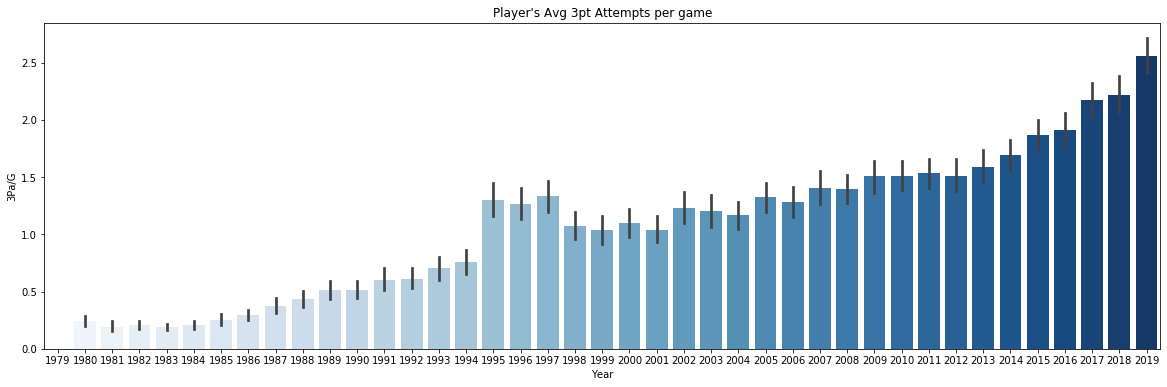

In [5]:
plt.figure(figsize=(20, 6))
sns.barplot(data=dataset, x="Year" , y="3Pa/G", palette="Blues").set_title("Player's Avg 3pt Attempts per game");

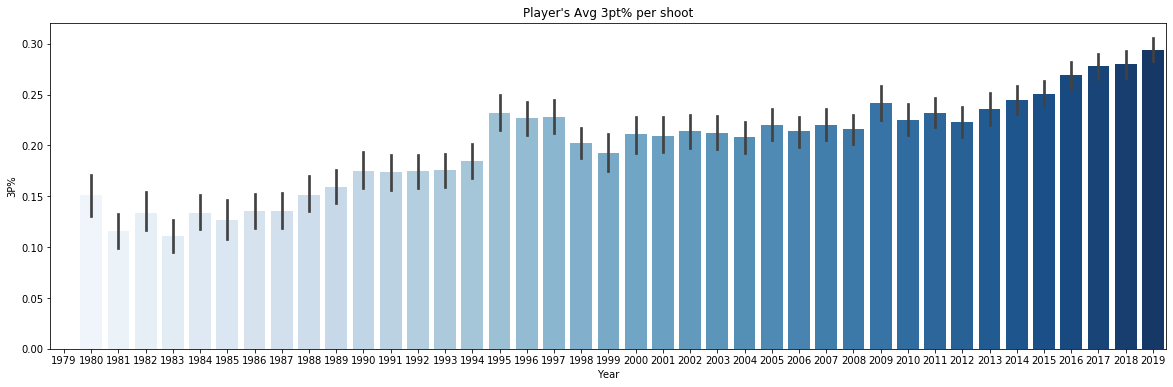

In [6]:
plt.figure(figsize=(20, 6))
sns.barplot(data=dataset, x="Year" , y="3P%", palette="Blues").set_title("Player's Avg 3pt% per shoot");

We see almost a linear growth through out the year's. In the 80's player's were shooting less 0.5 3pt's per game.
Last season that number surpass 2.5 3pt's per game.

We also see an increase in the 3pt%. Player's are not only shooting more three's, they are shooting with a higher accuracy.

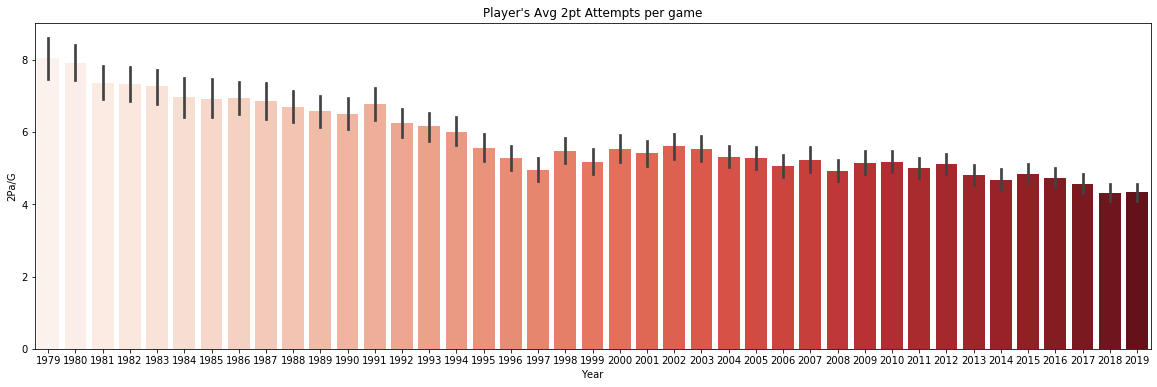

In [7]:
plt.figure(figsize=(20, 6))
sns.barplot(data=dataset, x="Year" , y="2Pa/G", palette="Reds").set_title("Player's Avg 2pt Attempts per game");

We see the opposite when we look at the 2pt's per game. in the 80's the average was around 7 2pt's per game. last season that number is around 4.

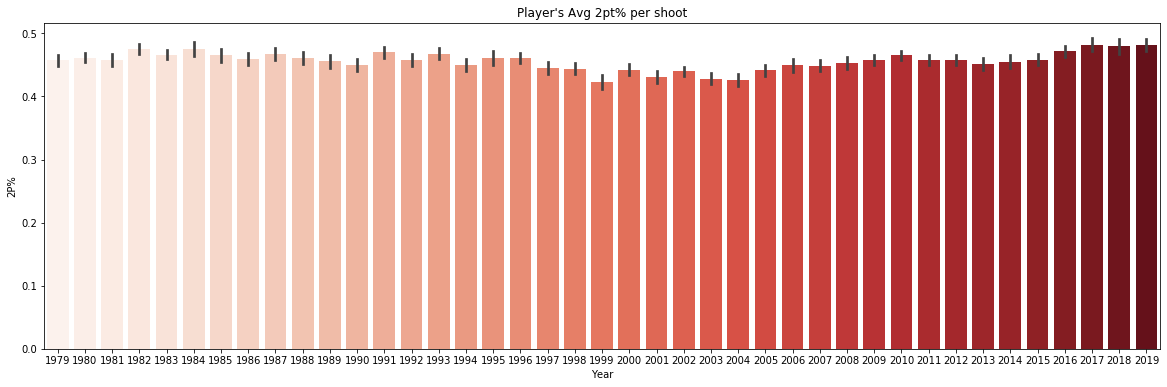

In [8]:
plt.figure(figsize=(20, 6))
sns.barplot(data=dataset, x="Year" , y="2P%", palette="Reds").set_title("Player's Avg 2pt% per shoot");

there were some oscillation in the 2pt% over the year's, but always staying between 40 and 50%. We can see a growth since 03-04. 

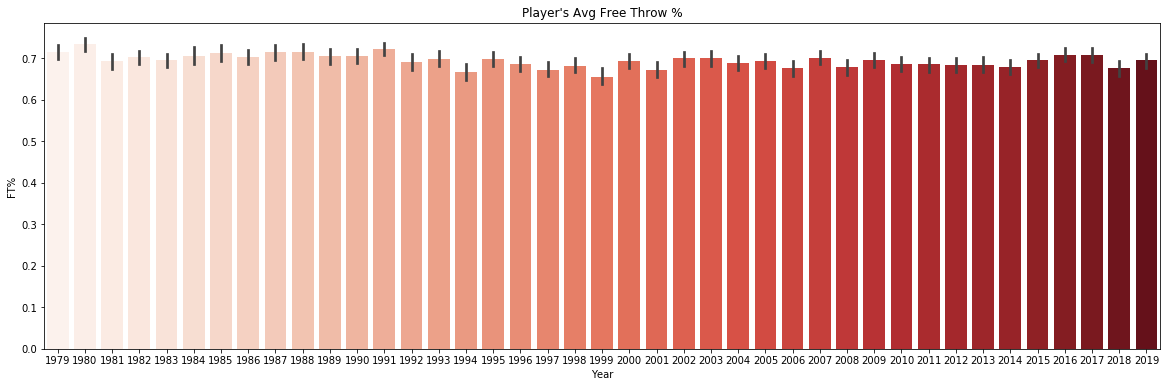

In [9]:
plt.figure(figsize=(20, 6))
sns.barplot(data=dataset, x="Year" , y="FT%", palette="Reds").set_title("Player's Avg Free Throw %");

Here we have the free throws % also over the year's. Free throws are normally used to measure how good of a shooter a player is. We can see that player's weren't bad shooter back then, the reason they shoot less 3pt's and at a lower percentage is that they weren't incetivized to do it.

Now we are going to look at player's age and production. First i am going to compare player's from before 1999 to player's after 2000.

In [10]:
dataset2000 = dataset.loc[dataset["Year"]>1999]
dataset1900 = dataset.loc[dataset["Year"]<=1999]

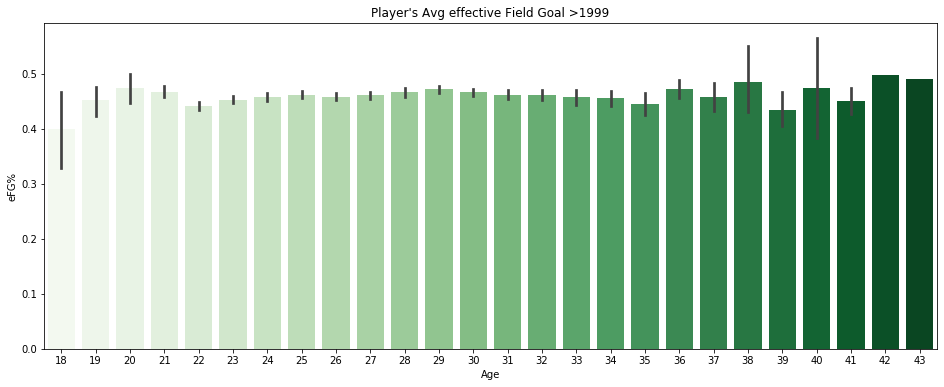

In [11]:
plt.figure(figsize=(16, 6))
sns.barplot(data=dataset1900, x="Age" , y="eFG%", palette="Greens").set_title("Player's Avg effective Field Goal >1999");

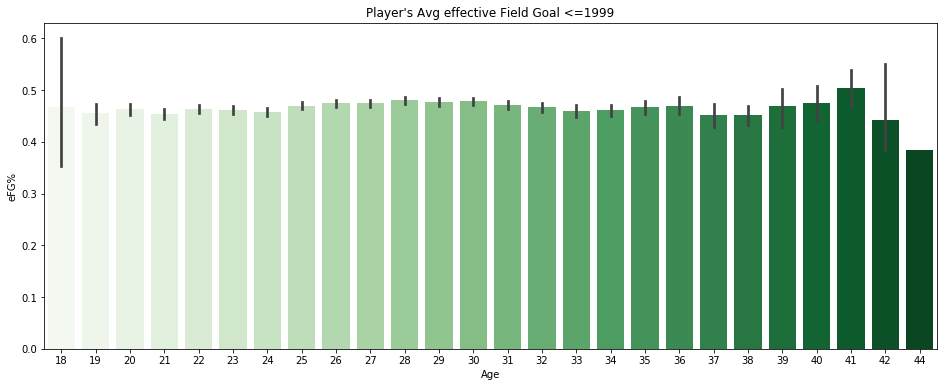

In [12]:
plt.figure(figsize=(16, 6))
sns.barplot(data=dataset2000, x="Age" , y="eFG%", palette="Greens").set_title("Player's Avg effective Field Goal <=1999");

The only notable difference that I see is the small bump from 19-21 year's old in the 1900 graph, but the volume is smaller than 2000 graph. From now on I won't separate the player's in >1999 and <=1999.
 Considering volume and quality, player's peak at 29-30 year's old.

Filtering to find the number of player's per age and removing the minority.

In [13]:
datasetAges = dataset.groupby("Age").count()
datasetAges["Player"]>200
mask2 = dataset["Age"]<=36
mask3 = dataset["Age"]>=20
datasetAges = dataset[mask2][mask3]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


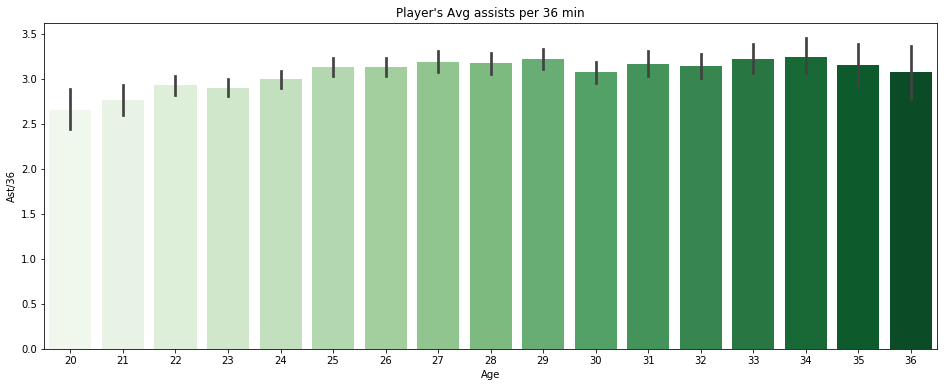

In [14]:
plt.figure(figsize=(16, 6))
sns.barplot(data=datasetAges , x="Age" , y="Ast/36", palette="Greens").set_title("Player's Avg assists per 36 min");

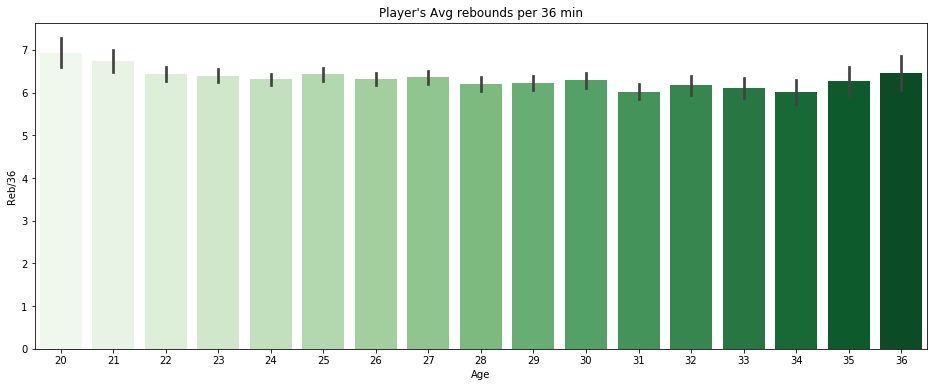

In [15]:
plt.figure(figsize=(16, 6))
sns.barplot(data=datasetAges, x="Age" , y="Reb/36", palette="Greens").set_title("Player's Avg rebounds per 36 min");

Assists are one of the harder skills to learn in the NBA. It take experience and a lot of playing time to get better at it. Player's normally peak at 29/30 year's old.
Rebounds also take some experience but raw effort and athleticism goes a long way, young player's have an advantage here, but after that is gone player's also normally peak at 29/30 year's old.


We are going to look at player's position now.

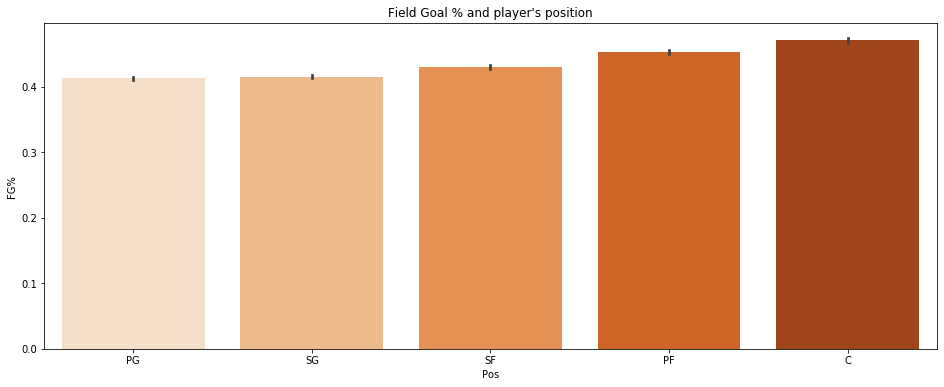

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(data=dataset, x="Pos" , y="FG%", palette="Oranges", order=["PG", "SG", "SF", "PF", "C"]).set_title("Field Goal % and player's position");

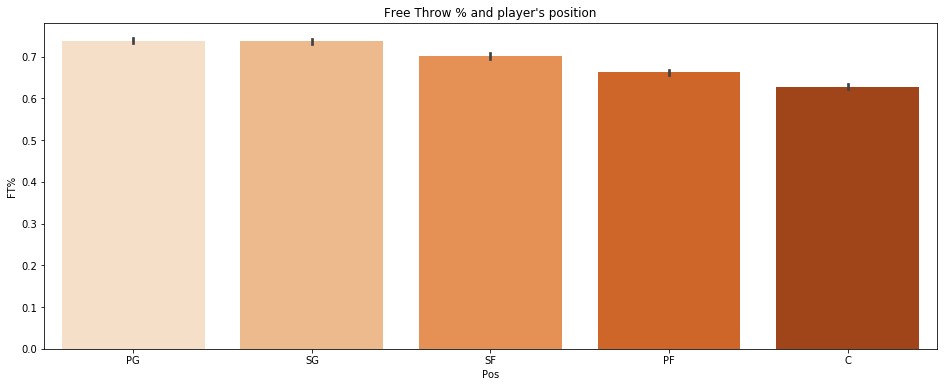

In [17]:
plt.figure(figsize=(16, 6))
sns.barplot(data=dataset, x="Pos" , y="FT%", palette="Oranges", order=["PG", "SG", "SF", "PF", "C"]).set_title("Free Throw % and player's position");

Center's shoot the highest percentage from the floor. They are also playing the closest to the basket.
Point Guard's shoot the lowest percentage from the floor, but they normally play from the perimeter, far from the basket.
    Because of that Point Guard's need to have a good shoot, the Free Throw % graph tell that is true. the opossite is true for Centers.